In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [15]:
df = pd.read_csv('../Data/grand_slams_cleaned.csv', parse_dates=[5])
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-580,Australian Open,Hard,128.0,G,1991-01-14,1,101222,1.0,Stefan Edberg,R,188.0,SWE,24.9,101432,0.0,Dimitri Poliakov,R,183.0,UKR,22.9,6-1 7-6(6) 6-2,5,R128,114.0,2.0,3.0,94.0,71.0,53.0,9.0,13.0,6.0,7.0,1.0,2.0,104.0,72.0,43.0,11.0,14.0,4.0,10.0,1.0,3889.0,162.0,202.0
1,1991-580,Australian Open,Hard,128.0,G,1991-01-14,2,100995,0.0,Eduardo Masso,L,178.0,BEL,27.0,101242,0.0,Brad Pearce,R,175.0,USA,24.8,6-7(4) 6-1 6-7(6) 6-3 8-6,5,R128,220.0,4.0,2.0,186.0,145.0,89.0,27.0,28.0,8.0,15.0,1.0,5.0,177.0,110.0,67.0,29.0,26.0,7.0,18.0,124.0,278.0,81.0,453.0
2,1991-580,Australian Open,Hard,128.0,G,1991-01-14,3,101138,0.0,Pat Cash,R,183.0,AUS,25.6,101120,0.0,Karel Novacek,R,190.0,CZE,25.7,6-2 6-4 6-1,5,R128,110.0,2.0,3.0,82.0,54.0,36.0,18.0,13.0,5.0,7.0,1.0,1.0,87.0,59.0,31.0,12.0,12.0,9.0,16.0,84.0,432.0,32.0,845.0
3,1991-580,Australian Open,Hard,128.0,G,1991-01-14,4,100870,0.0,Christo Van Rensburg,R,185.0,RSA,28.2,101256,0.0,Mark Kratzmann,L,178.0,AUS,24.6,6-3 6-1 7-5,5,R128,117.0,4.0,3.0,76.0,44.0,33.0,22.0,14.0,2.0,4.0,2.0,4.0,101.0,49.0,26.0,26.0,14.0,8.0,15.0,59.0,527.0,82.0,448.0
4,1991-580,Australian Open,Hard,128.0,G,1991-01-14,5,101731,0.0,Nuno Marques,L,190.0,POR,20.7,101416,0.0,Joao Cunha Silva,R,173.0,POR,23.1,4-6 6-4 1-6 6-3 6-4,5,R128,178.0,1.0,2.0,133.0,100.0,73.0,16.0,23.0,7.0,11.0,2.0,3.0,126.0,77.0,57.0,28.0,23.0,9.0,13.0,104.0,340.0,116.0,299.0


##### *Pre-match stats*

In [16]:
gdf = pd.DataFrame()
gdf['surface'] = df['surface']
gdf['round'] = df['round']
gdf['player1'] = df['winner_id']
gdf['w_name'] = df['winner_name']
gdf['player2'] = df['loser_id']
gdf['l_name'] = df['loser_name']
gdf['height_diff'] = df['winner_ht'] - df['loser_ht']
gdf['age_diff'] =  df['winner_age'] - df['loser_age']
gdf['rank_diff'] = df['loser_rank'] - df['winner_rank'] #(positive number means the winner had a better (lower) rank)
gdf['rank_point_diff'] = df['winner_rank_points'] - df['loser_rank_points']
gdf['seed_diff'] = df['loser_seed'] - df['winner_seed']

In [17]:
w_first_slam_age = df.groupby('winner_id')['winner_age'].min()
l_first_slam_age = df.groupby('loser_id')['loser_age'].min()

gdf['exp_diff']  = df['winner_id'].map(w_first_slam_age) - df['loser_id'].map(l_first_slam_age)

In [18]:
from collections import defaultdict

h2h_dict = defaultdict(int)
h2h_diff = []

for w, l in zip(df['winner_id'], df['loser_id']):
    wins = h2h_dict[(w, l)]
    loses = h2h_dict[(l, w)]
    h2h_diff.append(wins - loses)

    h2h_dict[(w, l)] += 1
    
gdf['h2h_diff'] = h2h_diff

In [19]:
from collections import defaultdict

w_last_wins = []
l_last_wins = []
win_count = defaultdict(int)

for w, l in zip(df['winner_name'], df['loser_name']):
    w_last_wins.append(win_count[w])
    l_last_wins.append(win_count[l])
    win_count[w] += 1

gdf['w_past_wins'] = w_last_wins
gdf['l_past_wins'] = l_last_wins
gdf['past_wins_diff'] = gdf['w_past_wins'] - gdf['l_past_wins']

In [20]:
df.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
16661,2024-560,Us Open,Hard,128.0,G,2024-08-26,222,126203,12.0,Taylor Fritz,R,196.0,USA,26.8,100644,4.0,Alexander Zverev,R,198.0,GER,27.3,7-6(2) 3-6 6-4 7-6(3),5,QF,206.0,12.0,5.0,128.0,81.0,66.0,25.0,21.0,2.0,4.0,14.0,4.0,145.0,103.0,77.0,20.0,22.0,11.0,13.0,12.0,3120.0,4.0,7035.0
16662,2024-560,Us Open,Hard,128.0,G,2024-08-26,223,126207,20.0,Frances Tiafoe,R,188.0,USA,26.5,105777,9.0,Grigor Dimitrov,R,191.0,BUL,33.2,6-3 6-7(5) 6-3 4-1 RET,5,QF,184.0,3.0,5.0,107.0,53.0,39.0,36.0,17.0,3.0,4.0,8.0,11.0,130.0,71.0,53.0,22.0,18.0,8.0,14.0,20.0,2120.0,9.0,3655.0
16663,2024-560,Us Open,Hard,128.0,G,2024-08-26,224,206173,1.0,Jannik Sinner,R,191.0,ITA,23.0,207733,25.0,Jack Draper,L,193.0,GBR,22.6,7-5 7-6(3) 6-2,5,SF,183.0,11.0,2.0,96.0,62.0,48.0,25.0,16.0,3.0,4.0,8.0,10.0,131.0,64.0,43.0,32.0,16.0,7.0,11.0,1.0,9360.0,25.0,1695.0
16664,2024-560,Us Open,Hard,128.0,G,2024-08-26,225,126203,12.0,Taylor Fritz,R,196.0,USA,26.8,126207,20.0,Frances Tiafoe,R,188.0,USA,26.5,4-6 7-5 4-6 6-4 6-1,5,SF,198.0,16.0,3.0,131.0,76.0,57.0,36.0,25.0,1.0,5.0,11.0,9.0,131.0,71.0,57.0,27.0,24.0,5.0,11.0,12.0,3120.0,20.0,2120.0
16665,2024-560,Us Open,Hard,128.0,G,2024-08-26,226,206173,1.0,Jannik Sinner,R,191.0,ITA,23.0,126203,12.0,Taylor Fritz,R,196.0,USA,26.8,6-3 6-4 7-5,5,F,136.0,6.0,5.0,85.0,43.0,38.0,20.0,15.0,5.0,7.0,10.0,4.0,90.0,53.0,36.0,16.0,16.0,6.0,12.0,1.0,9360.0,12.0,3120.0


In [21]:
gdf.tail()

,surface,round,player1,w_name,player2,l_name,height_diff,age_diff,rank_diff,rank_point_diff,seed_diff,exp_diff,h2h_diff,w_past_wins,l_past_wins,past_wins_diff
16661,Hard,QF,126203,Taylor Fritz,100644,Alexander Zverev,-2.0,-0.5,-8.0,-3915.0,-8.0,1.7,-1,51,101,-50
16662,Hard,QF,126207,Frances Tiafoe,105777,Grigor Dimitrov,-3.0,-6.7,-11.0,-1535.0,-11.0,0.8,0,47,96,-49
16663,Hard,SF,206173,Jannik Sinner,207733,Jack Draper,-2.0,0.4,24.0,7665.0,24.0,-1.1,0,59,13,46
16664,Hard,SF,126203,Taylor Fritz,126207,Frances Tiafoe,8.0,0.3,8.0,1000.0,8.0,2.5,1,52,48,4
16665,Hard,F,206173,Jannik Sinner,126203,Taylor Fritz,-5.0,-3.8,11.0,6240.0,11.0,0.2,0,60,53,7


# EDA

### Does height impacts winning?

skewness:  0.018153380791555734


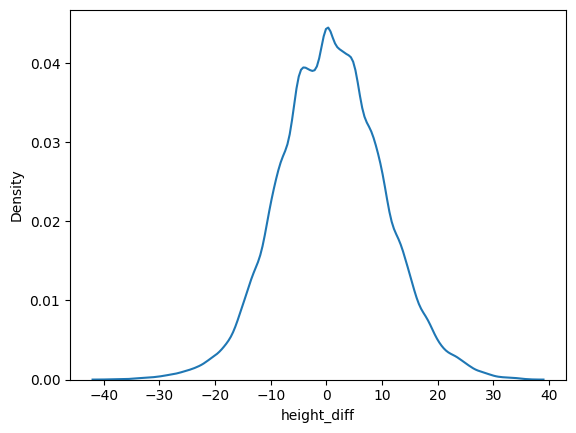

In [22]:
sns.kdeplot(gdf.height_diff)
print('skewness: ',gdf.height_diff.skew())

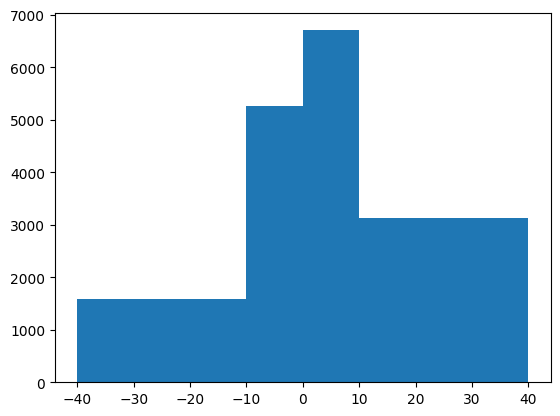

In [23]:
plt.hist(gdf.height_diff, bins=[-40, -10, 0, 10, 40])
plt.show()

In [24]:
print('win_counts_shorter_ht: ',gdf.query('height_diff < 0').shape[0])
print('win_counts_taller_ht: ', gdf.query('height_diff > 0').shape[0])

win_counts_shorter_ht:  6842
win_counts_taller_ht:  8031


It looks like taller people have some advantage. lets verify:

Null hypothesis (H₀): Mean height_diff = 0 (no height advantage)

Alt hypothesis (H₁): Mean height_diff > 0

In [25]:
from scipy import stats

sample = gdf.height_diff
tstat, pvalue = stats.ttest_1samp(sample, popmean=0, alternative='greater')
print(f"T-statistic: {tstat}")
print(f"P-value: {pvalue}")
if pvalue < 0.05:
    print('Taller players has advantage over shorter ones.')

T-statistic: 12.149855018725225
P-value: 3.994292378336974e-34
Taller players has advantage over shorter ones.


##### Surface Vs Heights

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
Clay,4181.0,0.489835,9.331980,-33.0,-5.0,0.0,7.0,33.0
Grass,4082.0,1.374816,9.264346,-38.0,-5.0,2.0,8.0,35.0
Hard,8403.0,0.832441,9.377571,-38.0,-5.0,0.0,7.0,35.0


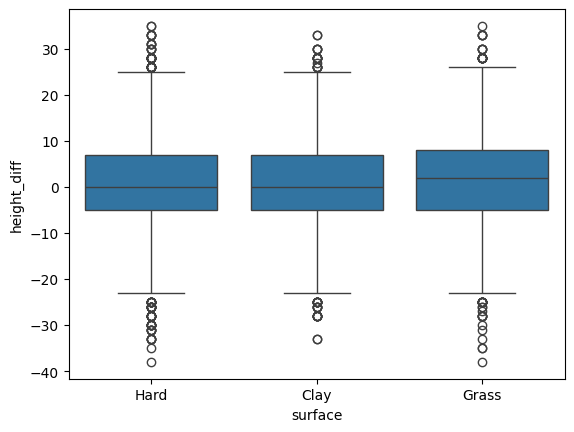

In [26]:
sns.boxplot(x='surface', y='height_diff', data=gdf)
gdf.groupby('surface')['height_diff'].describe()

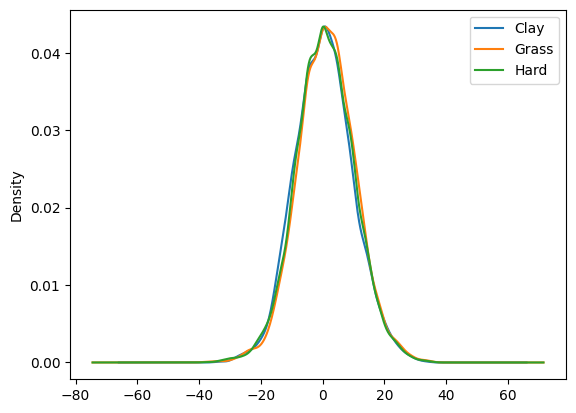

In [27]:
gdf.groupby('surface')['height_diff'].plot(kind='kde', legend=True)
plt.show()

It looks like taller guys wins more on grass.

*Check if height_diff distributions differ between surfaces*

Null hypothesis (H₀): All surfaces have the same height_diff distribution

Alt hypothesis (H₁): At least one surface differs

In [28]:
surface_groups = gdf.groupby('surface')['height_diff']
hard = surface_groups.get_group('Hard')
clay = surface_groups.get_group('Clay')
grass = surface_groups.get_group('Grass')
print(hard.shape, clay.shape, grass.shape)

from scipy.stats import kruskal

stat, p_val = kruskal(hard, clay, grass)
if p_val < 0.05:
    print('Surface does impact height_diff pattern')

(8403,) (4181,) (4082,)
Surface does impact height_diff pattern


**Confirmed: Taller players have an edge, especially on Grass.**

### Does age diffrence impacts match outcomes?

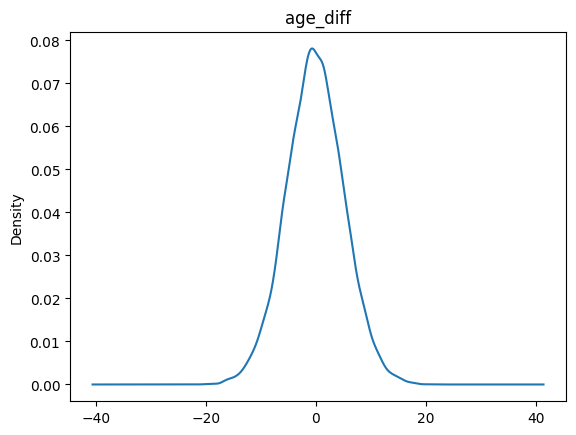

In [29]:
gdf['age_diff'].plot(kind='kde', title='age_diff')
plt.show()

In [30]:
gdf.age_diff.describe()

count    16666.000000
mean        -0.118949
std          5.231335
min        -20.100000
25%         -3.600000
50%         -0.200000
75%          3.400000
max         20.900000
Name: age_diff, dtype: float64

In [31]:
import pingouin as pg

ttest = pg.ttest(gdf.age_diff, 0)
ttest


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.935371,16665,two-sided,0.003336,"[-0.2, -0.04]",0.022738,0.648,0.835279


*age matters a bit — but not enough to make strong decisions from it alone.*

##### Age by Surface

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
Clay,4181.0,-0.269840,5.140753,-20.1,-3.7,-0.3,3.3,19.5
Grass,4082.0,-0.004336,5.257045,-19.0,-3.5,0.0,3.5,17.7
Hard,8403.0,-0.099548,5.262293,-19.7,-3.6,-0.1,3.3,20.9


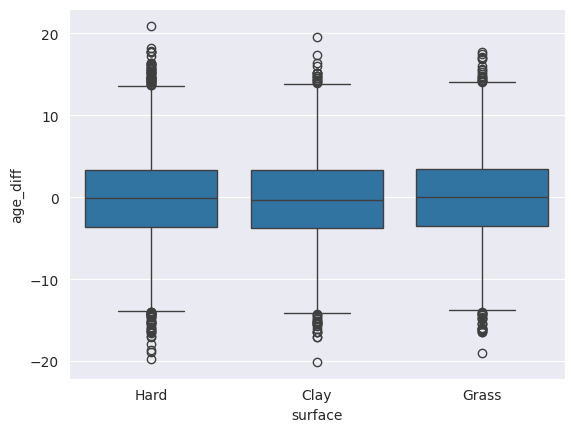

In [32]:
sns.set_style("darkgrid")
sns.boxplot(x='surface', y='age_diff', data=gdf)
gdf.groupby('surface')['age_diff'].describe()
# Most matches involve players within ~7 years of each other

In [33]:
kruskal_test = pg.kruskal(data=gdf, dv='age_diff', between='surface')
kruskal_test

,Source,ddof1,H,p-unc
Kruskal,surface,2,5.544808,0.062512


*overall younger players win slightly more, that effect is not surface-dependent.*

### Do more experienced players win more?

-kurtosis:  0.955871709773013 -skew:  0.061254738199933566


count    16666.000000
mean        -0.302886
std          3.437553
min        -18.400000
25%         -2.400000
50%         -0.300000
75%          1.800000
max         18.200000
Name: exp_diff, dtype: float64

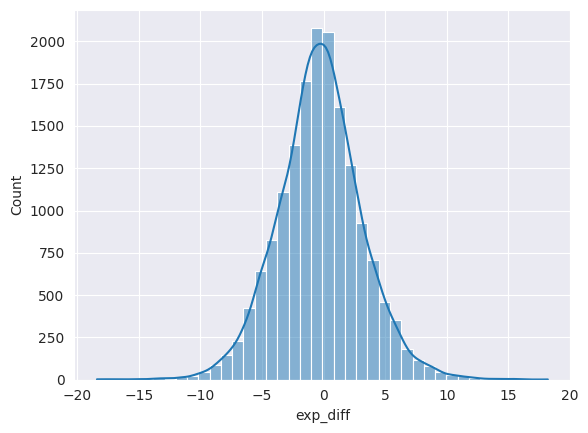

In [34]:
sns.histplot(gdf.exp_diff, kde=True, bins=40)
print('-kurtosis: ', gdf.exp_diff.kurtosis(), "-skew: ", gdf.exp_diff.skew())
gdf.exp_diff.describe()

In [35]:
print(gdf.query('exp_diff > 0')['exp_diff'].mean(),
gdf.query('exp_diff < 0')['exp_diff'].mean())

2.599190552016985 -2.771447856901789


In [36]:
pg.ttest(gdf.exp_diff, 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-11.374848,16665,two-sided,7.191437e-30,"[-0.36, -0.25]",0.088111,8.397e+25,NaN


*experience shows inverse relationship with winning.*

##### experience and round

,count,mean,std,min,25%,50%,75%,max
round,,,,,,,,
R128,8372.0,-0.231187,3.641460,-18.0,-2.5,-0.3,2.1,18.2
R64,4233.0,-0.431065,3.451652,-17.6,-2.6,-0.4,1.7,16.3
R32,2080.0,-0.383558,3.128434,-13.8,-2.3,-0.4,1.4,13.0
R16,1053.0,-0.298386,2.965038,-11.9,-2.1,-0.3,1.5,15.3
QF,530.0,-0.096038,2.583736,-13.0,-1.6,-0.1,1.3,13.8
SF,265.0,-0.373208,2.510342,-18.4,-1.4,-0.2,0.8,6.2
F,133.0,-0.194737,2.064722,-7.7,-1.2,0.1,0.8,5.2


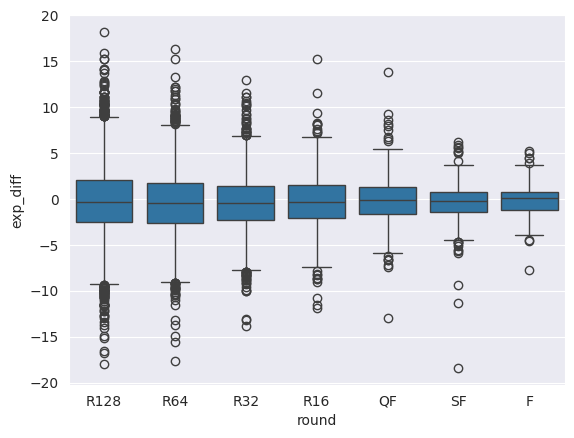

In [37]:
sns.boxplot(x='round', y='exp_diff', data=gdf)
gdf.groupby('round')['exp_diff'].describe().sort_values(by='count', ascending=False)

*Less experienced players win more in early rounds, but experience starts to help deeper into the tournament.*

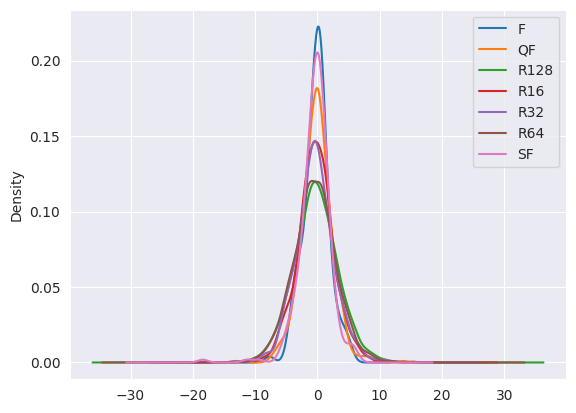

In [38]:
gdf.groupby('round')['exp_diff'].plot(kind='kde', legend=True)
plt.show()

In [39]:
# (H₀): exp_diff distribution is the same across all rounds

pg.kruskal(data=gdf, dv='exp_diff', between='round')

,Source,ddof1,H,p-unc
Kruskal,round,6,14.113943,0.028389


Null Hypothesis (H₀): exp_diff distribution is the same across all rounds

p = 0.028 < 0.05 → Reject H₀

→ Experience difference varies significantly by round

### featuring new serve stats

##### *Post-match stats*

In [40]:
# Percentage winner/loser aces and their difference
gdf['w_ace_%'] = (df['w_ace'] / df['w_svpt'].replace(0, 1))*100
gdf['l_ace_%'] = (df['l_ace'] /  df['l_svpt'].replace(0, 1))*100
gdf['ace_diff'] = (gdf['w_ace_%'] - gdf['l_ace_%'])

# Percentage winner/loser double faults and their difference
gdf['w_df_%'] = (df['w_df'] / df['w_svpt'].replace(0, 1))*100
gdf['l_df_%'] = (df['l_df'] /  df['l_svpt'].replace(0, 1))*100
gdf['df_diff'] =(gdf['l_df_%'] - gdf['w_df_%']) # Recerse cuz positive df_diff means loser had more faults (good for winner)

# Percentage winner/loser 1st serves and their difference
gdf['w_1stIn_%'] = (df['w_1stIn'] / df['w_svpt'].replace(0, 1))*100
gdf['l_1stIn_%'] = (df['l_1stIn'] / df['l_svpt'].replace(0, 1))*100
gdf['1stIn_diff'] = (gdf['w_1stIn_%'] - gdf['l_1stIn_%'])

# Percentage winner/loser 1st serves won and their difference
gdf['w_1stWon_%'] = (df['w_1stWon'] / df['w_1stIn'].replace(0, 1))*100
gdf['l_1stWon_%'] = (df['l_1stWon'] / df['l_1stIn'].replace(0, 1))*100
gdf['1stWon_diff'] = (gdf['w_1stWon_%'] - gdf['l_1stWon_%'])

# Percentage winner/loser 2nd serves won and their difference
gdf['w_2ndWon_%'] = (df['w_2ndWon'] / (df['w_svpt'] - df['w_1stIn']).replace(0, 1))*100
gdf['l_2ndWon_%'] = (df['l_2ndWon'] / (df['l_svpt'] - df['l_1stIn']).replace(0, 1))*100
gdf['2ndWon_diff'] = (gdf['w_2ndWon_%'] - gdf['l_2ndWon_%'])


gdf.tail()

,surface,round,player1,w_name,player2,l_name,height_diff,age_diff,rank_diff,rank_point_diff,seed_diff,exp_diff,h2h_diff,w_past_wins,l_past_wins,past_wins_diff,w_ace_%,l_ace_%,ace_diff,w_df_%,l_df_%,df_diff,w_1stIn_%,l_1stIn_%,1stIn_diff,w_1stWon_%,l_1stWon_%,1stWon_diff,w_2ndWon_%,l_2ndWon_%,2ndWon_diff
16661,Hard,QF,126203,Taylor Fritz,100644,Alexander Zverev,-2.0,-0.5,-8.0,-3915.0,-8.0,1.7,-1,51,101,-50,9.375000,9.655172,-0.280172,3.906250,2.758621,-1.147629,63.281250,71.034483,-7.753233,81.481481,74.757282,6.724200,53.191489,47.619048,5.572442
16662,Hard,QF,126207,Frances Tiafoe,105777,Grigor Dimitrov,-3.0,-6.7,-11.0,-1535.0,-11.0,0.8,0,47,96,-49,2.803738,6.153846,-3.350108,4.672897,8.461538,3.788641,49.532710,54.615385,-5.082674,73.584906,74.647887,-1.062982,66.666667,37.288136,29.378531
16663,Hard,SF,206173,Jannik Sinner,207733,Jack Draper,-2.0,0.4,24.0,7665.0,24.0,-1.1,0,59,13,46,11.458333,6.106870,5.351463,2.083333,7.633588,5.550254,64.583333,48.854962,15.728372,77.419355,67.187500,10.231855,73.529412,47.761194,25.768218
16664,Hard,SF,126203,Taylor Fritz,126207,Frances Tiafoe,8.0,0.3,8.0,1000.0,8.0,2.5,1,52,48,4,12.213740,8.396947,3.816794,2.290076,6.870229,4.580153,58.015267,54.198473,3.816794,75.000000,80.281690,-5.281690,65.454545,45.000000,20.454545
16665,Hard,F,206173,Jannik Sinner,126203,Taylor Fritz,-5.0,-3.8,11.0,6240.0,11.0,0.2,0,60,53,7,7.058824,11.111111,-4.052288,5.882353,4.444444,-1.437908,50.588235,58.888889,-8.300654,88.372093,67.924528,20.447565,47.619048,43.243243,4.375804


In [41]:
df.tail()[['winner_name', 'loser_name', 'w_df', 'l_df']]

,winner_name,loser_name,w_df,l_df
16661,Taylor Fritz,Alexander Zverev,5.0,4.0
16662,Frances Tiafoe,Grigor Dimitrov,5.0,11.0
16663,Jannik Sinner,Jack Draper,2.0,10.0
16664,Taylor Fritz,Frances Tiafoe,3.0,9.0
16665,Jannik Sinner,Taylor Fritz,5.0,4.0


##### Does surface effects winning serve points?

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
Hard,8403.0,61.224744,7.468041,35.359116,56.313235,61.111111,66.185313,100.000000
Clay,4181.0,62.441375,8.166092,0.000000,57.037037,62.337662,67.605634,98.230088
Grass,4082.0,62.978979,6.900621,36.363636,58.219178,63.157895,67.789606,86.666667


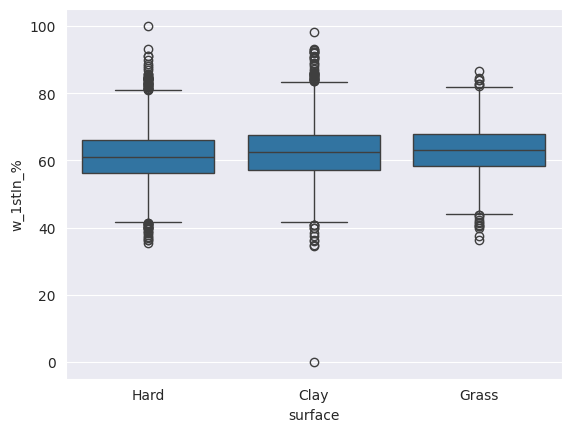

In [42]:
sns.boxplot(x='surface', y='w_1stIn_%', data=gdf)
gdf.groupby('surface')['w_1stIn_%'].describe().sort_values(by='count', ascending=False)

In [43]:
gdf = gdf.drop(gdf['w_1stIn_%'].idxmin()) # <-- w_1stIn-% = 0 was noise

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
Hard,8403.0,55.021307,9.543724,0.0,48.684211,54.545455,60.956555,100.000000
Clay,4180.0,55.300245,9.764923,0.0,48.837209,54.838710,61.224490,161.538462
Grass,4082.0,55.286943,9.756146,0.0,48.837209,55.000000,61.538462,100.000000


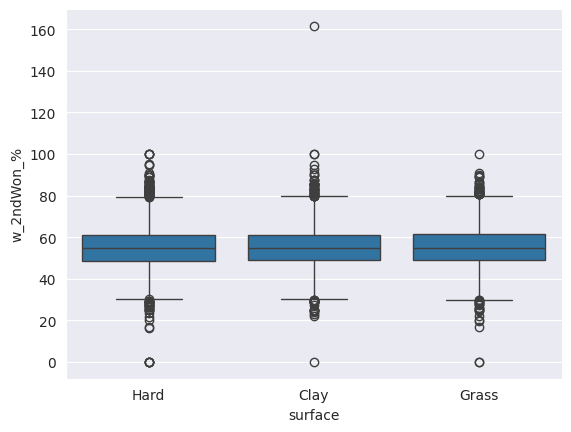

In [44]:
sns.boxplot(x='surface', y='w_2ndWon_%', data=gdf)
gdf.groupby('surface')['w_2ndWon_%'].describe().sort_values(by='count', ascending=False)

In [45]:
gdf = gdf.drop(gdf['w_2ndWon_%'].idxmax()) # <-- that guy was creating noise, w_2ndWon_% = 1.6. likely due to W_svpt - w_1stIn

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
Hard,8403.0,77.179777,7.179400,33.333333,72.289157,77.142857,82.142857,100.0
Clay,4179.0,74.220409,7.425386,44.736842,69.047619,74.025974,79.166667,100.0
Grass,4082.0,79.486344,6.990332,57.142857,74.698795,79.452055,84.313725,100.0


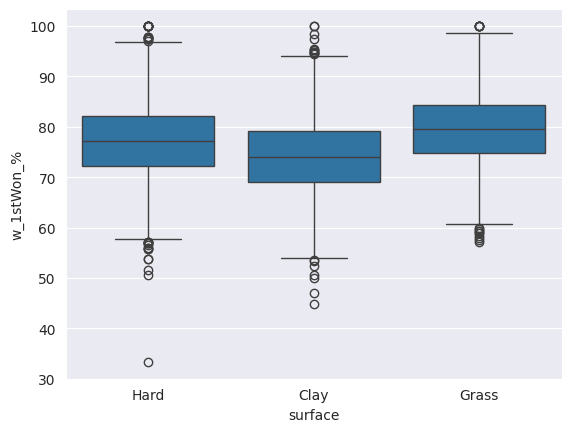

In [46]:
sns.boxplot(x='surface', y='w_1stWon_%', data=gdf)
gdf.groupby('surface')['w_1stWon_%'].describe().sort_values(by='count', ascending=False)

*Surface does effect winning first serve point. Grass has highest w_1stWin_% (grass > hard > clay)
<br>extreme outliers are data errors.*

### Ranking_diff

skew: 1.8071439548562196


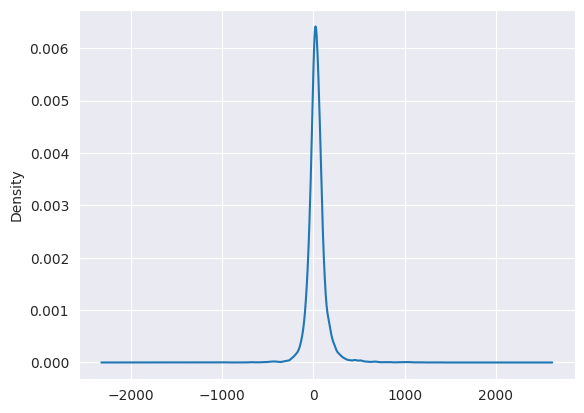

In [47]:
gdf.rank_diff.plot(kind='kde')
print(f"skew: {gdf.rank_diff.skew()}")

### Head2Head

,count,mean,std,min,25%,50%,75%,max
round,,,,,,,,
R128,8371.0,0.031060,0.363496,-4.0,0.0,0.0,0.0,5.0
R64,4232.0,0.060964,0.463835,-3.0,0.0,0.0,0.0,5.0
R32,2080.0,0.112500,0.641545,-3.0,0.0,0.0,0.0,6.0
R16,1053.0,0.150047,0.867830,-6.0,0.0,0.0,0.0,7.0
QF,530.0,0.209434,1.250900,-6.0,0.0,0.0,1.0,5.0
SF,265.0,0.452830,1.616277,-7.0,0.0,0.0,1.0,7.0
F,133.0,0.383459,1.865646,-7.0,0.0,0.0,1.0,6.0


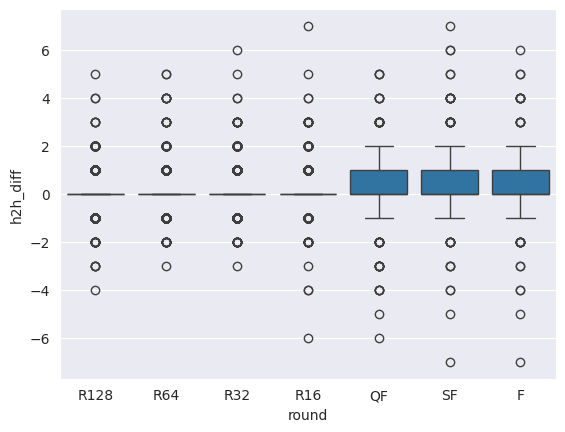

In [48]:
sns.boxplot(data=gdf, x='round', y='h2h_diff')
gdf.groupby('round')['h2h_diff'].describe().sort_values(by='count', ascending=False)

In [49]:
print((gdf['h2h_diff'] <= 0).sum() / len(gdf)) # In 89% of matches, the winner had no H2H edge.
gdf.groupby('round')['h2h_diff'].apply(lambda x: (x > 0).mean() * 100) # In finals, ~39% of winners had H2H edge.

0.8959433509361497


round
F       39.849624
QF      29.433962
R128     6.080516
R16     20.607787
R32     15.576923
R64      8.931947
SF      36.603774
Name: h2h_diff, dtype: float64

*While H2H doesn't matter in early rounds, from quarterfinals onwards, winners tend to have better past records against their opponents.*

### How past_wins effects

w_skew_kurt: (np.float64(3.0994812642015774), np.float64(11.633785188927249)) 
l_skew_kurt: (np.float64(4.1727976252095695), np.float64(27.836806992145927))


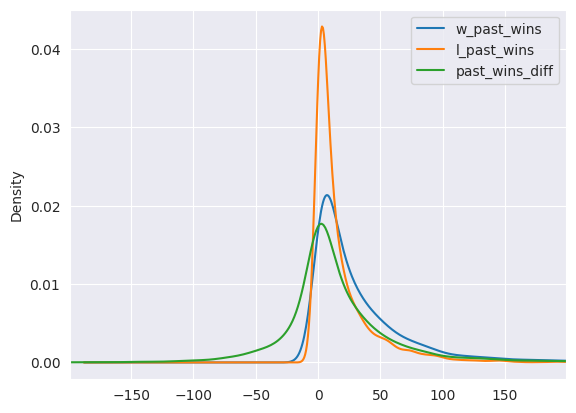

In [50]:
gdf.w_past_wins.plot(kind='kde')
gdf.l_past_wins.plot(kind='kde')
gdf.past_wins_diff.plot(kind='kde')
plt.xlim(-199, 199)
print(f"w_skew_kurt: {gdf.w_past_wins.skew(), gdf.w_past_wins.kurt()} \nl_skew_kurt: {gdf.l_past_wins.skew(), gdf.l_past_wins.kurt()}")
plt.legend()

,count,mean,std,min,25%,50%,75%,max
round,,,,,,,,
R128,8371.0,13.131048,44.200393,-220.0,-3.0,4.0,23.00,369.0
R64,4232.0,18.701796,54.090153,-297.0,-3.0,9.0,33.00,369.0
R32,2080.0,25.272115,64.232906,-357.0,-4.0,13.0,41.00,357.0
R16,1053.0,32.698006,79.920635,-334.0,-4.0,16.0,52.00,359.0
QF,530.0,31.094340,91.750023,-359.0,-13.0,18.0,57.75,347.0
SF,265.0,36.415094,99.597606,-322.0,-8.0,20.0,68.00,354.0
F,133.0,32.398496,112.685735,-318.0,-18.0,17.0,75.00,312.0


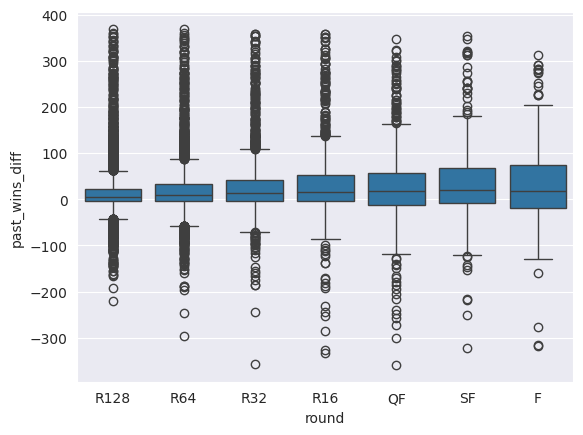

In [51]:

sns.boxplot(data=gdf, x='round', y='past_wins_diff')
gdf.groupby('round')['past_wins_diff'].describe().sort_values(by='count', ascending=False)

*Players with more historical wins tend to perform better, especially in later rounds. However, the presence of winners with fewer wins—even in finals—highlights that experience, while important, isn’t always decisive.*

In [52]:
gdf.columns

Index(['surface', 'round', 'player1', 'w_name', 'player2', 'l_name',
       'height_diff', 'age_diff', 'rank_diff', 'rank_point_diff', 'seed_diff',
       'exp_diff', 'h2h_diff', 'w_past_wins', 'l_past_wins', 'past_wins_diff',
       'w_ace_%', 'l_ace_%', 'ace_diff', 'w_df_%', 'l_df_%', 'df_diff',
       'w_1stIn_%', 'l_1stIn_%', '1stIn_diff', 'w_1stWon_%', 'l_1stWon_%',
       '1stWon_diff', 'w_2ndWon_%', 'l_2ndWon_%', '2ndWon_diff'],
      dtype='object')

### Exporting grand_slam_df aka gdf

In [54]:
gdf.to_csv("../Data/gdf.csv", index=False)